https://www.cosmos.esa.int/web/gaia/iow_20200320

Cos theta justification

In [1]:
'''
Here i want to create a neural network which takes in the full file, and learns the map which beest describes extinction.
Conditions:
Should be non-decreasing along radial direction
correlation to different sighlines


Set up as a l,w,d grid
along the d direction is nondecresing in each sighline
also correlated in the l,w of each d bin
can i implement it as a neural network with d layers
at each layer it looks at the l,w grid but not each node in the l,w grid is coonnected, only connected to ones near them, might have to
be padded
at each layer it throws out a value for each l,w grid, and the next layer adds to that. 

The function is constant but the grid itself is the parameters

work forwards and branch off, then minimise the nn for the parameters, the nn foesnt have any inputs

put in all zeros, it computes the ext of the first window and so on 

i need a map A:l,w,d ->stars
some sort of tokenisation

each datapoint can have an index associated with it mapping associated with it


'''

'\nHere i want to create a neural network which takes in the full file, and learns the map which beest describes extinction.\nConditions:\nShould be non-decreasing along radial direction\ncorrelation to different sighlines\n\n\nSet up as a l,w,d grid\nalong the d direction is nondecresing in each sighline\nalso correlated in the l,w of each d bin\ncan i implement it as a neural network with d layers\nat each layer it looks at the l,w grid but not each node in the l,w grid is coonnected, only connected to ones near them, might have to\nbe padded\nat each layer it throws out a value for each l,w grid, and the next layer adds to that. \n\nThe function is constant but the grid itself is the parameters\n\nwork forwards and branch off, then minimise the nn for the parameters, the nn foesnt have any inputs\n\nput in all zeros, it computes the ext of the first window and so on \n\ni need a map A:l,w,d ->stars\nsome sort of tokenisation\n\neach datapoint can have an index associated with it map

In [21]:
from src import Normalising_Flow_nodist
from src import Normalising_Flow_nodist
from src.Bayesian_NN_nodist import BayesianExtinction_Trainer

import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer


nf=Normalising_Flow_nodist.Normalising_Flow_Trainer()
nf.load()



In [57]:
import pandas as pd
import seaborn as sn
data_test=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/data_black_ps_1')
galactic_coord = SkyCoord(ra=data_test['ra'].values*u.degree, dec=data_test['dec'].values*u.degree, frame='icrs')
galactic_coord = galactic_coord.transform_to('galactic')
l=galactic_coord.l.value
b=galactic_coord.b.value
data_test['l']=l
data_test['b']=b

In [58]:
data_test['b']

0     22.274637
1     22.348106
2     22.368303
3     22.226067
4     22.257579
5     22.210080
6     22.240394
7     22.262157
8     22.191387
9     22.159775
10    22.192653
11    22.224503
12    22.211213
13    22.297871
14    22.293695
15    22.325374
16    22.366698
17    22.313027
18    22.277646
19    22.331886
20    22.359827
21    22.380643
22    22.377387
23    22.373874
24    22.386038
25    22.214060
26    22.236372
27    22.277165
28    22.296043
29    22.427408
30    22.418425
31    22.435867
32    22.432097
33    22.390514
Name: b, dtype: float64

In [71]:
import numpy as np
data_test['mu_sin']=data_test['mu']*np.sin(np.radians(data_test['b']))
data_test['mu_cos']=10**((data_test['mu']+5)/5)*np.cos(np.radians(data_test['b']))

(40.0, 90.0)

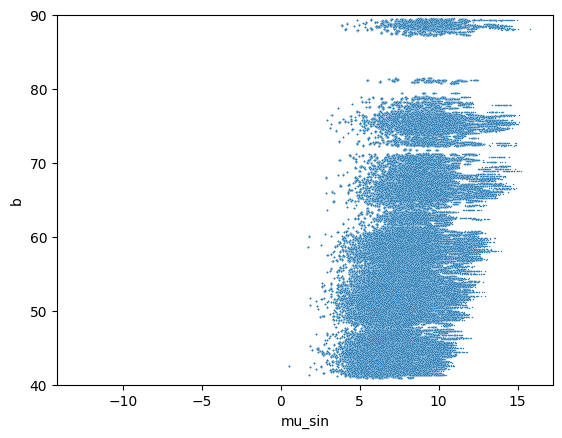

In [54]:
import matplotlib.pyplot as plt
sn.scatterplot(data_test,x='mu_sin',y='b',s=1)

plt.ylim(40,90)


In [61]:
data_test['bprp']=data_test['phot_bp_mean_mag']-data_test['phot_rp_mean_mag']

<Axes: xlabel='mu', ylabel='bprp'>

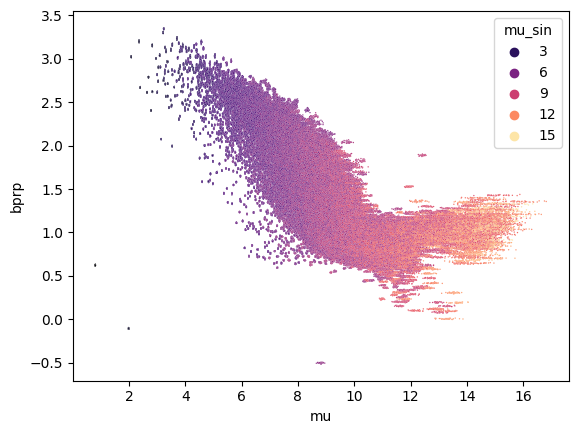

In [41]:
sn.scatterplot(data_test[data_test['b']>40],x='mu',y='bprp',hue='mu_sin',s=1,palette='magma')



<Axes: xlabel='mu', ylabel='bprp'>

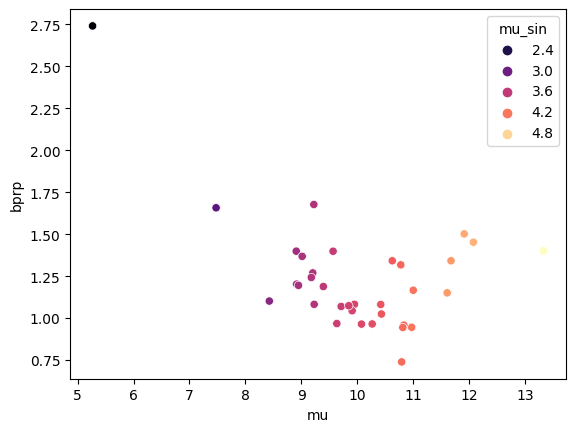

In [72]:
sn.scatterplot(data_test,x='mu',y='bprp',hue='mu_sin',palette='magma')


<Axes: xlabel='mu_cos', ylabel='bprp'>

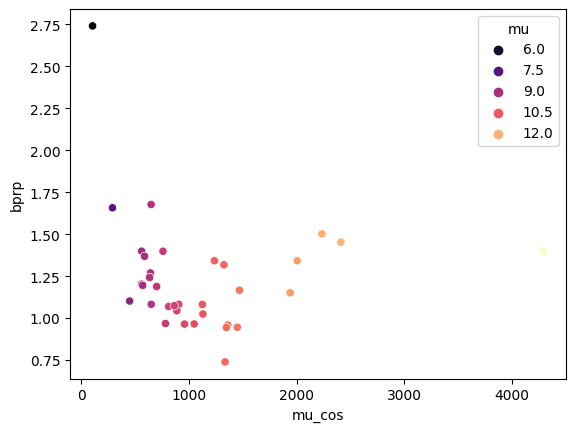

In [73]:
sn.scatterplot(data_test,x='mu_cos',y='bprp',hue='mu',palette='magma')


<Axes: xlabel='mu_sin', ylabel='bprp'>

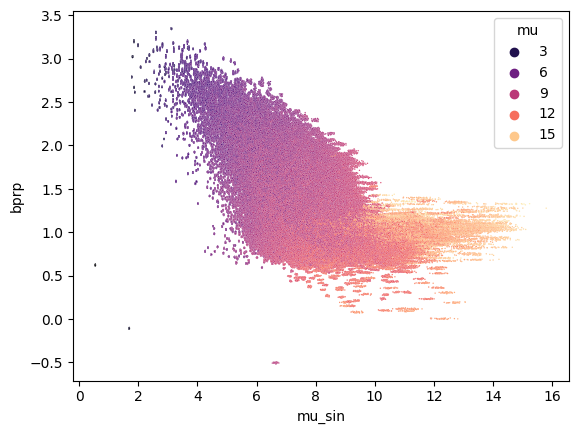

In [56]:
sn.scatterplot(data_test[data_test['b']>40],x='mu_sin',y='bprp',hue='mu',s=1,palette='magma')



<Axes: xlabel='mu_sin', ylabel='mu'>

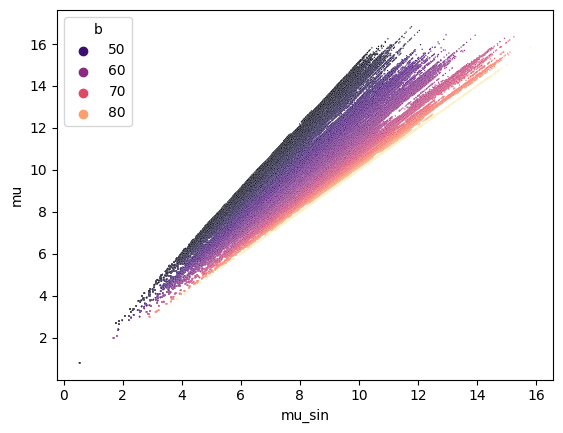

In [37]:
sn.scatterplot(data_test[data_test['b']>40],x='mu_sin',y='mu',hue='b',s=1,palette='magma',hue_norm=(40,90))


<Axes: >

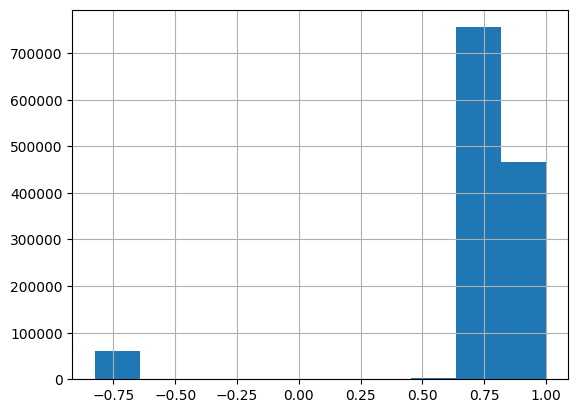

In [31]:
(np.sin(np.radians(data_test['b']))).hist()

(40.0, 90.0)

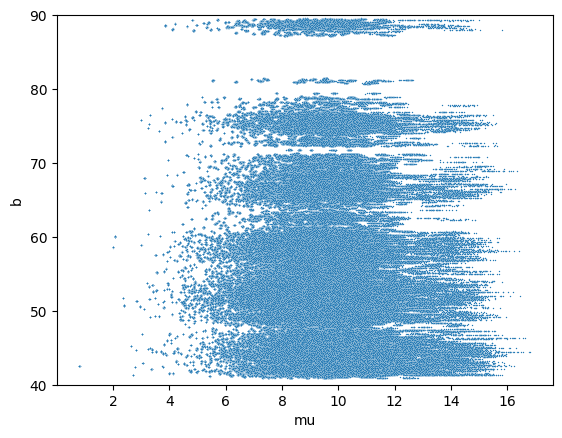

In [20]:
sn.scatterplot(data_test,x='mu',y='b',s=1)

plt.ylim(40,90)


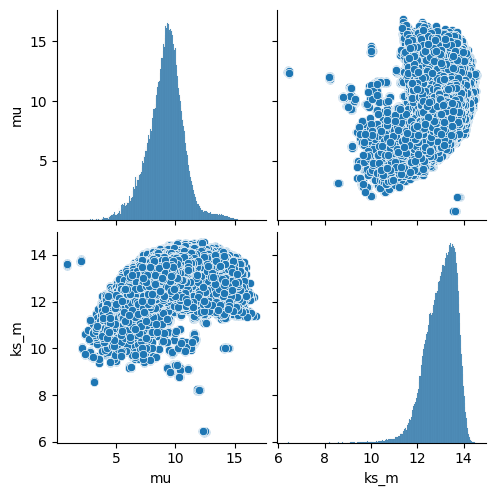

In [8]:
sn.pairplot(data_test[['mu','ks_m']])

In [2]:
from astropy.coordinates import SkyCoord
import astropy.units as u


In [22]:
data_test=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/data_black_circle')
galactic_coord = SkyCoord(ra=data_test['ra'].values*u.degree, dec=data_test['dec'].values*u.degree, frame='icrs')
galactic_coord = galactic_coord.transform_to('galactic')
l=galactic_coord.l.value
b=galactic_coord.b.value
data_test['l']=l
data_test['b']=b

In [27]:
import dustmaps

In [28]:
dustmaps.edenhofer2023.fetch()


  3.0 GiB of 3.0 GiB |  13.2 MiB/s |################### |  99% | ETA:   0:00:00

In [67]:
from astropy.coordinates import SkyCoord

from dustmaps.edenhofer2023 import Edenhofer2023Query
from dustmaps.bayestar import BayestarQuery

# Note that below, we could use version='bayestar2017' to get the newer
# version of the map. Note, however, that the reddening units are not
# identical in the two versions of the map. See Green et al. (2018) for
# an explanation of the units.
eden = Edenhofer2023Query()
bayestar = BayestarQuery()


Optimizing map for querying (this might take a couple of seconds)...


Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 44.817 s
  pix_info:   0.818 s
   samples:  27.883 s
      best:   5.427 s
       nan:   0.077 s
      sort:  10.527 s
       idx:   0.086 s


In [68]:
galactic_coord = SkyCoord(ra=294.46007047*u.deg, dec=72.23165519*u.deg, frame='icrs')
galactic_coord = galactic_coord.transform_to('galactic')
l=galactic_coord.l.value
b=galactic_coord.b.value


In [69]:
coords = SkyCoord(l*u.deg, b*u.deg,distance = np.arange(10,  2000, 5)*u.pc, frame='galactic')


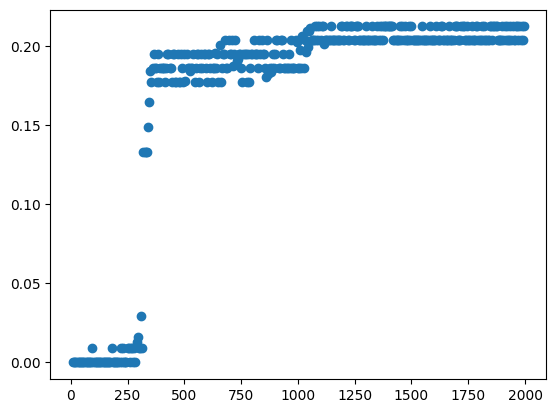

In [72]:
plt.scatter(np.arange(10,  2000, 5),2.742*bayestar(coords)/3.1)
#plt.scatter(np.arange(10,  2000, 5),eden(coords))

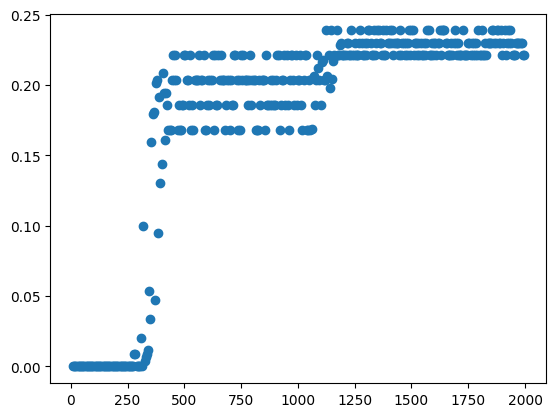

In [74]:
galactic_coord = SkyCoord(ra=295.31396796*u.deg, dec=71.95873259*u.deg, frame='icrs')
galactic_coord = galactic_coord.transform_to('galactic')
l=galactic_coord.l.value
b=galactic_coord.b.value
coords = SkyCoord(l*u.deg, b*u.deg,distance = np.arange(10,  2000, 5)*u.pc, frame='galactic')
plt.scatter(np.arange(10,  2000, 5),2.742*bayestar(coords)/3.1)



In [3]:
import numpy as np

In [6]:
coeffs= (np.array([
        [0.194059063720102, -0.000337880688254366, 0.000405004510990789, -0.000119030825664077, -2.90629429374213e-05, 9.85596051245887e-09, 1.22296149043372e-10, 0, 0, 0],
        [0.255058871064972, 7.19016588950228e-05, -0.000250455702483274, 3.99422163967702e-05, -6.83632867675118e-05, -2.3163568526324e-09, 7.26631781961228e-10, -2.27788077229475e-07, 4.97609167483581e-07, 6.67076034469308e-09],
        [0.340301468237771, -0.000826269158576803, -0.000283696380615497, 0.000103538996307887, -0.000156039957793959, 1.81587525109325e-07, 2.33928990111011e-09, 1.63733498839871e-06, 5.71693287820809e-08, 2.954302715354e-08],
        [0.663374149569189, -0.0184814428792349, 0.0100266536020118, -0.00317119320308867, -0.00649336268398495, 3.27674122186053e-05, 1.57894227641494e-06, -0.000116290469708794, 0.000117366662432525, 6.91273258513903e-06],
        [1.1516008149802, -0.0502982507379423, -0.00801054248601918, 0.0028487377407222, -0.0222045923218139, 0.000841943191161668, -1.31018008013547e-05, 0.00346423295251231, -0.000145621334026214, -6.85718568409361e-05],
        [0.993548688906439, -0.110149052160837, 0.0264447715065468, -0.00571010222810317, -0.0374363031107716, 0.00151447309438712, -2.52364537395156e-05, 0.00623824755961677, -0.000123598316318183, -0.000158499801004388]
        ]))




def f(x,a,i):
    
    coeff=coeffs[i]
    result=coeff[0]*np.ones_like(x)
    result+=coeff[1]*x
    result+=coeff[2]*x**2
    result+=coeff[3]*x**3

    result+=coeff[4]*a
    result+=coeff[5]*a**2
    result+=coeff[6]*a**3

    result+=coeff[7]*x*a
    result+=coeff[8]*a*x**2
    result+=coeff[9]*x*a**2
    return result

In [13]:
k=0
h=1
j=2


In [23]:
kk=f(np.linspace(-1,5,100),1,k)
kj=f(np.linspace(-1,5,100),1,j)
kh=f(np.linspace(-1,5,100),1,h)


kG=f(np.linspace(-1,5,100),1,-1)
kBP=f(np.linspace(-1,5,100),1,-2)
kRP=f(np.linspace(-1,5,100),1,-3)

print(kG.mean())
print(kBP.mean())
print(kRP.mean())
print(kj.mean())
print(kh.mean())
print(kk.mean())


0.7847673898401542
1.0539355109568633
0.6077522385199633
0.3392234073595502
0.2544220337117148
0.19307574127991572


In [75]:


# Define a function to construct polynomial equations
def construct_polynomial(coefficients, variables):
    """
    Constructs a polynomial equation using coefficients and variables.
    :param coefficients: Coefficients of the polynomial terms.
    :param variables: Names of the variables.
    :return: Polynomial equation as a string.
    """
    # Initialize the polynomial equation
    polynomial = ""

    # Iterate through coefficients and variables simultaneously
    for coef, var in zip(coefficients, variables):
        # Append the coefficient and variable to the polynomial equation
        if coef != 0:  # Exclude terms with zero coefficients
            polynomial += f" + {coef:.10f} * {var}" if coef > 0 else f" - {-coef:.10f} * {var}"

    # Remove leading '+' sign if present
    if polynomial.startswith(" + "):
        polynomial = polynomial[3:]

    return polynomial

# Data provided
data = [
    [0.194059063720102, -0.000337880688254366, 0.000405004510990789, -0.000119030825664077, -2.90629429374213e-05, 9.85596051245887e-09, 1.22296149043372e-10, 0, 0, 0, "GK", "kK"],
    [0.255058871064972, 7.19016588950228e-05, -0.000250455702483274, 3.99422163967702e-05, -6.83632867675118e-05, -2.3163568526324e-09, 7.26631781961228e-10, -2.27788077229475e-07, 4.97609167483581e-07, 6.67076034469308e-09, "GK", "kH"],
    [0.340301468237771, -0.000826269158576803, -0.000283696380615497, 0.000103538996307887, -0.000156039957793959, 1.81587525109325e-07, 2.33928990111011e-09, 1.63733498839871e-06, 5.71693287820809e-08, 2.954302715354e-08, "GK", "kJ"],
    [0.663374149569189, -0.0184814428792349, 0.0100266536020118, -0.00317119320308867, -0.00649336268398495, 3.27674122186053e-05, 1.57894227641494e-06, -0.000116290469708794, 0.000117366662432525, 6.91273258513903e-06, "GK", "kRP"],
    [1.1516008149802, -0.0502982507379423, -0.00801054248601918, 0.0028487377407222, -0.0222045923218139, 0.000841943191161668, -1.31018008013547e-05, 0.00346423295251231, -0.000145621334026214, -6.85718568409361e-05, "GK", "kBP"],
    [0.993548688906439, -0.110149052160837, 0.0264447715065468, -0.00571010222810317, -0.0374363031107716, 0.00151447309438712, -2.52364537395156e-05, 0.00623824755961677, -0.000123598316318183, -0.000158499801004388, "GK", "kG"]
]

# Extract variable names from the first row
variables = data[0][1:-2]

# Iterate through data to construct polynomial equations
for line in data:
    intercept = line[0]
    coefficients = line[1:-2]  # Exclude Intercept, Xname, and Kname
    polynomial_equation = construct_polynomial(coefficients, variables)
    print(f"Polynomial equation: {intercept:.10f} {polynomial_equation}")


Polynomial equation: 0.1940590637  - 0.0003378807 * -0.000337880688254366 + 0.0004050045 * 0.000405004510990789 - 0.0001190308 * -0.000119030825664077 - 0.0000290629 * -2.90629429374213e-05 + 0.0000000099 * 9.85596051245887e-09 + 0.0000000001 * 1.22296149043372e-10
Polynomial equation: 0.2550588711 0.0000719017 * -0.000337880688254366 - 0.0002504557 * 0.000405004510990789 + 0.0000399422 * -0.000119030825664077 - 0.0000683633 * -2.90629429374213e-05 - 0.0000000023 * 9.85596051245887e-09 + 0.0000000007 * 1.22296149043372e-10 - 0.0000002278 * 0 + 0.0000004976 * 0 + 0.0000000067 * 0
Polynomial equation: 0.3403014682  - 0.0008262692 * -0.000337880688254366 - 0.0002836964 * 0.000405004510990789 + 0.0001035390 * -0.000119030825664077 - 0.0001560400 * -2.90629429374213e-05 + 0.0000001816 * 9.85596051245887e-09 + 0.0000000023 * 1.22296149043372e-10 + 0.0000016373 * 0 + 0.0000000572 * 0 + 0.0000000295 * 0
Polynomial equation: 0.6633741496  - 0.0184814429 * -0.000337880688254366 + 0.0100266536 * 

In [79]:
f(1,1,-1)

0.8741433889962158

In [86]:
for i in np.arange(6,-1,-1):
    print(i)

6
5
4
3
2
1
0


In [7]:
vals=data_test[:len(data_test)//32]

In [8]:
vals

,Unnamed: 0,ks_m,mu,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,j_m,h_m,ra,dec,l,b
0,0,14.686,10.123389,17.417168,18.191969,16.561285,15.596,14.817,161.086361,56.152116,152.203692,53.142507
1,1,12.071,8.811945,13.293809,13.576944,12.848462,12.380,12.117,161.128923,56.171730,152.153471,53.148760
2,2,12.275,8.460098,13.986485,14.398796,13.413757,12.748,12.359,161.235722,56.230161,152.015457,53.158452
3,3,13.901,7.804389,17.029867,18.081440,16.021727,14.738,14.225,161.219167,56.251359,151.997581,53.137981
4,4,12.941,8.548056,14.967326,15.449209,14.322596,13.506,13.004,161.322605,56.302533,151.871026,53.150416
...,...,...,...,...,...,...,...,...,...,...,...,...
10946,10946,14.327,10.956942,15.903316,16.218317,15.403839,14.796,14.515,340.513205,-48.468022,343.743574,-57.126785
10947,10947,13.092,10.489192,14.468698,14.763159,14.007372,13.460,13.144,340.554131,-48.435115,343.772768,-57.166393
10948,10948,13.686,8.750587,16.590677,17.428671,15.692063,14.615,13.962,340.559846,-48.423702,343.787880,-57.175198
10949,10949,13.397,9.520226,15.173147,15.557863,14.616169,13.969,13.553,340.458610,-48.451156,343.802794,-57.103092


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data_file='/Users/mattocallaghan/XPNorm/Data/data_full'
#test_file='/Users/mattocallaghan/XPNorm/Data/data_test'

#test_file='/Users/mattocallaghan/XPNorm/Data/data_noext'
#test_file='/Users/mattocallaghan/XPNorm/Data/data_black_circle'

#test_file='/Users/mattocallaghan/XPNorm/Data/data_red_circle'
test_file='/Users/mattocallaghan/XPNorm/Data/data_black_circle_20'
#test_file='/Users/mattocallaghan/XPNorm/Data/data_noext'

err_file='/Users/mattocallaghan/XPNorm/Data/err'



data=pd.read_csv(data_file)[['mu','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m','ks_m']].values

data_test=pd.read_csv(test_file)[['mu','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m','ks_m']].values


data_transform=np.array([
                    [1., 0., 0., 0., 0., 0.,0],
                    [-1., 1., 0., 0., 0., 0.,0],
                    [0., 1., -1., 0., 0., 0.,0],
                    [0., 1., 0., -1., 0., 0.,0],
                    [0., 1., 0., 0., -1., 0.,0],
                    [0., 1., 0., 0., 0., -1.,0],
                    [0., 1., 0., 0., 0., 0.,-1]])

g = np.array([0.7, 0.95])
bp =  np.array([0.97, 1.28])
rp =  np.array([0.55, 0.69])
j =  np.array([0.71, 0.73])/3.1
h =  np.array([0.45, 0.47])/3.1
ks =  np.array([0.34, 0.36])/3.1

extinction_vector=torch.tensor(np.einsum('ij,j->i',data_transform,
np.array([0,g.mean(), bp.mean(), rp.mean(), j.mean(), h.mean(), ks.mean()])))


data=np.einsum('ij,bj->bi',np.array(data_transform),np.array(data))

data=data[(data[:,1]<10)*(data[:,1]>-2)]
data=data[(data[:,0]<20)*(data[:,0]>2)]
data=data[:,1:]
mean=np.mean(data,axis=0)
std=np.std(data,axis=0)
data=(data-mean)

data_test=np.einsum('ij,bj->bi',np.array(data_transform),np.array(data_test))

data_test=data_test[(data_test[:,1]<10)*(data_test[:,1]>-2)]
data_test=data_test[(data_test[:,0]<20)*(data_test[:,0]>2)]
#dist_mean=data_test[:,0].mean()
#data_test[:,1:]=(data_test[:,1:]-mean)
##data_test[:,0]=data_test[:,0]-dist_mean

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

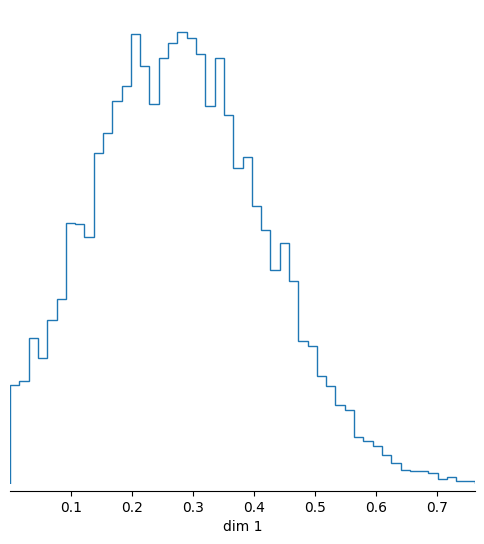

In [15]:
import pickle



#with open('filename.pickle', 'wb') as handle:
#    pickle.dump(posterior, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('filename.pickle', 'rb') as handle:
    posterior = pickle.load(handle)

observation = data_test[0,1:]
samples = posterior.sample((10000,), x=observation)
log_probability = posterior.log_prob(samples, x=observation)
_ = analysis.pairplot(samples, figsize=(6, 6))
plt.show()

In [18]:
ext=[]
for i in range(len(data_test)//32):
    observation = data_test[i,1:]
    samples = posterior.sample((10000,), x=observation)
    ext.append(samples.mean())


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

In [348]:
#data_test=data_test[:len(data_test)//32]
#idx=idx[:len(idx)//32]
ra=pd.read_csv(test_file)['ra'].values
dec=pd.read_csv(test_file)['dec'].values

#ra=ra[:len(ra)//32]
galactic_coord = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
galactic_coord = galactic_coord.transform_to('galactic')
l=galactic_coord.l.value
b=galactic_coord.b.value


In [349]:
tens=[]
for a in np.arange(-1,1,0.01):
    tens.append(nf.nfm.log_prob(torch.tensor(data_test[:,1:])-a*extinction_vector[None,1:]))

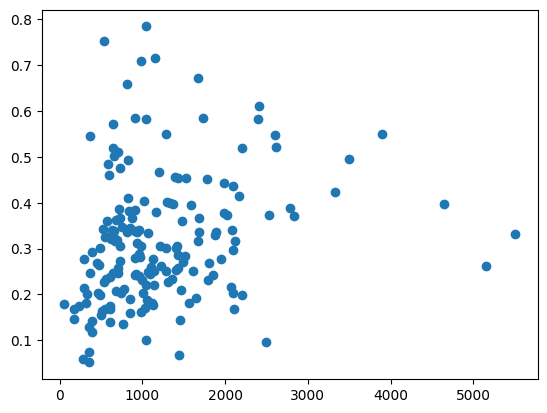

In [20]:
distance=10**((data_test[:len(data_test)//32,0]+5)/5)
ebv=np.array(ext)
plt.scatter(distance,ebv)

In [ ]:
ds=[]
es=[]
ls=[]
bs=[]
errs=[]
for i in range(len(distance)//32):
    ds.append(distance[i::len(distance)//32])
    es.append(ebv[i::len(ebv)//32])
    ls.append(l[i::len(l)//32])
    bs.append(b[i::len(b)//32])
    errs.append(errors[i::len(errors)//32])


In [341]:
distance=np.stack(ds)[idx[:len(distance)//32]]
ebv=np.stack(es)[idx[:len(ebv)//32]]
l=np.stack(ls)[idx[:len(l)//32]]
b=np.stack(bs)[idx[:len(b)//32]]

In [342]:
errors=np.stack(errs)[idx[:len(errors)//32]]

In [343]:
errors.shape

(32, 32)

In [344]:
distance.shape

(32, 32)

In [345]:
np.mean(errors,1)

array([0.05833188, 0.00624082, 0.00195787, 0.02758871, 0.01151642,
       0.05056434, 0.02317234, 0.04091986, 0.00871161, 0.00781305,
       0.0429328 , 0.01807992, 0.02063575, 0.00787418, 0.00917529,
       0.00947135, 0.00644819, 0.00864478, 0.00649867, 0.00566955,
       0.0041001 , 0.01891399, 0.04349659, 0.03583836, 0.02524262,
       0.00300035, 0.0226131 , 0.00632698, 0.02568317, 0.04102709,
       0.05261707, 0.00575978])

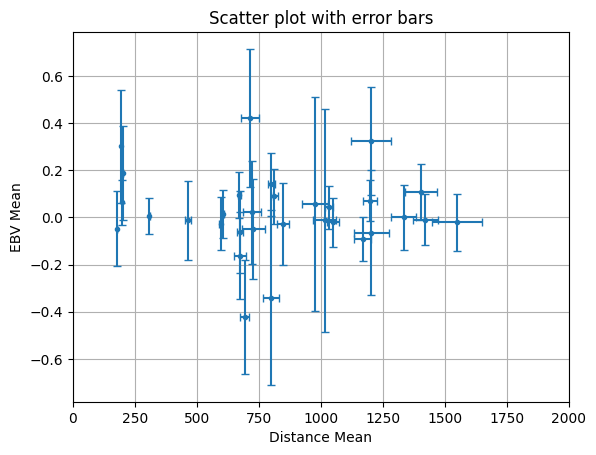

In [346]:
distance_mean = np.mean(distance, axis=1)
distance_std = np.std(distance, axis=1)

ebv_mean = np.mean(ebv, axis=1)
ebv_std = np.sqrt(np.std(ebv, axis=1)**2+np.mean(errors,1))

# Create scatter plot
plt.errorbar(distance_mean, ebv_mean, xerr=distance_std, yerr=ebv_std, fmt='o', markersize=3, capsize=3)
plt.xlabel('Distance Mean')
plt.xlim(0,2000)
#plt.ylim(0,0.3)
plt.ylabel('EBV Mean')
plt.title('Scatter plot with error bars')
plt.grid(True)
plt.show()

In [104]:
distance_mean = np.mean(distance, axis=1)
distance_std = np.std(distance, axis=1)

ebv_mean = np.mean(ebv, axis=1)
ebv_std = np.std(ebv, axis=1)

# Create scatter plot with colorbar based on 'ra'
plt.figure(figsize=(8, 6))
sc = plt.scatter(distance_mean, ebv_mean, c=ra.mean(axis=1), cmap='viridis', 
                 edgecolor='none', s=50, alpha=1)
plt.colorbar(sc, label='RA')
plt.errorbar(distance_mean, ebv_mean, 
             xerr=distance_std, yerr=ebv_std, 
             fmt='o', markersize=3, capsize=3, 
             color='black', alpha=0.6)

plt.xlabel('Distance Mean')
plt.xlim(0, 2000)
plt.ylabel('EBV Mean')
plt.title('Scatter plot with error bars')
plt.grid(True)
plt.show()


AxisError: axis 1 is out of bounds for array of dimension 1

<Figure size 800x600 with 0 Axes>

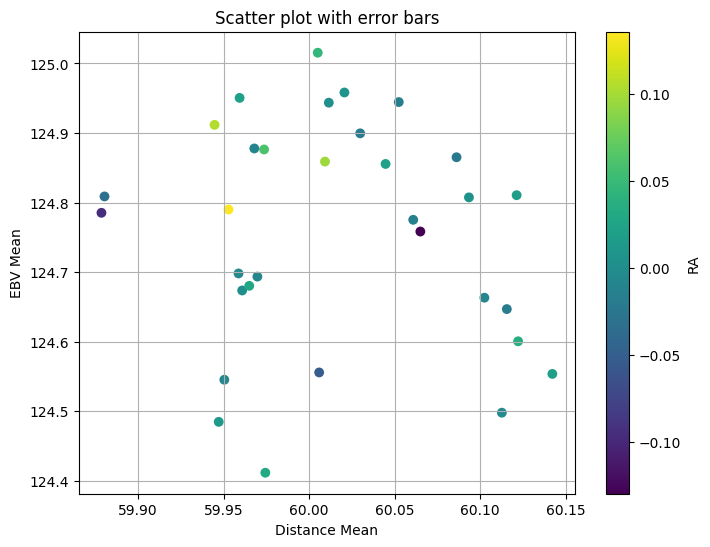

In [107]:
distance_mean = np.mean(distance, axis=1)
distance_std = np.std(distance, axis=1)

ebv_mean = np.mean(ebv, axis=1)
ebv_std = np.std(ebv, axis=1)

# Create scatter plot with colorbar based on 'ra'
plt.figure(figsize=(8, 6))
sc = plt.scatter(b.mean(1), l.mean(1), c=ebv_mean, cmap='viridis', 
                 edgecolor='none', s=50, alpha=1)
plt.colorbar(sc, label='RA')


plt.xlabel('Distance Mean')
#plt.xlim(0, 2000)
plt.ylabel('EBV Mean')
plt.title('Scatter plot with error bars')
plt.grid(True)
plt.show()


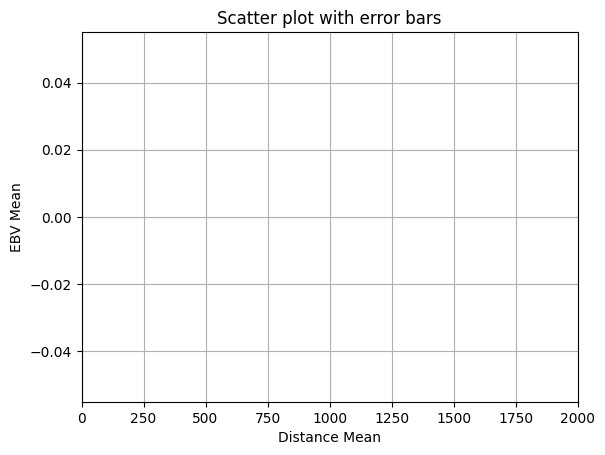

In [62]:
distance_mean = np.mean(distance, axis=1)
distance_std = np.std(distance, axis=1)

ebv_mean = np.mean(ebv, axis=1)
ebv_std = np.std(ebv, axis=1)

# Create scatter plot
plt.errorbar(distance_mean, ebv_mean, xerr=distance_std, yerr=ebv_std, fmt='o', markersize=3, capsize=3)
plt.xlabel('Distance Mean')
plt.xlim(0,2000)
#plt.ylim(0,0.3)
plt.ylabel('EBV Mean')
plt.title('Scatter plot with error bars')
plt.grid(True)
plt.show()

In [ ]:
break

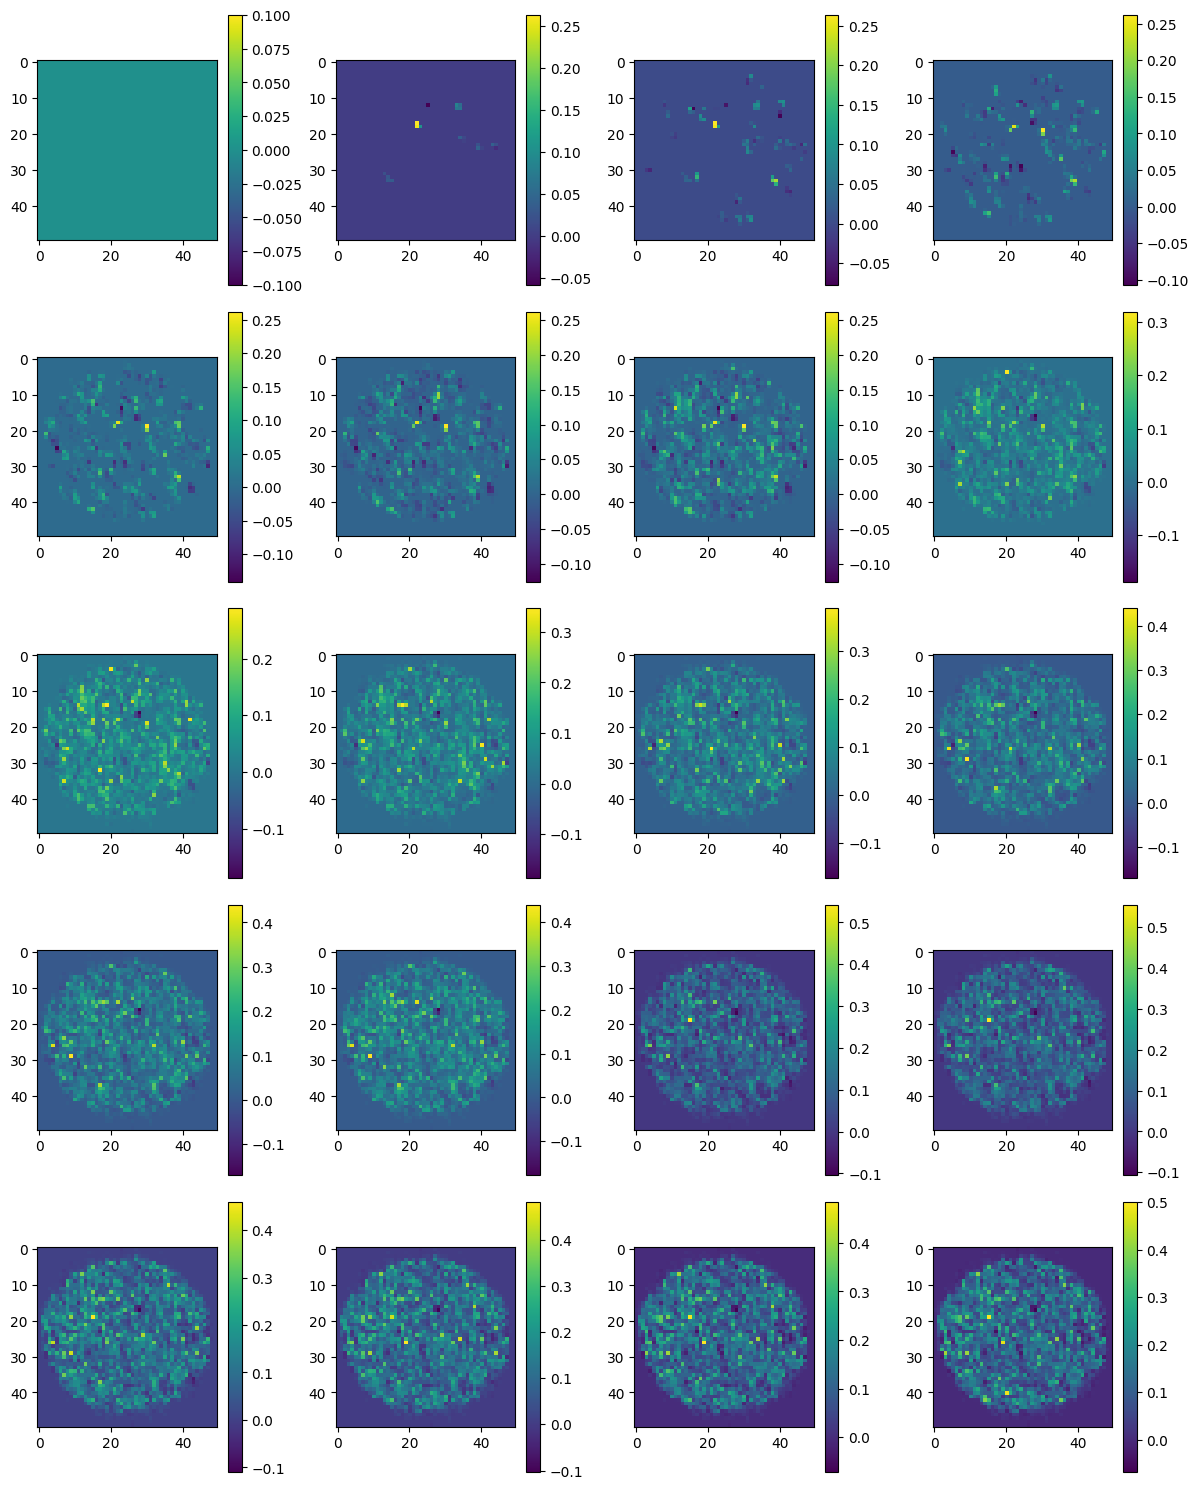

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming layers is a list containing arrays of shape (N, M) where N and M are the dimensions of the array

fig, axes = plt.subplots(5, 4, figsize=(12, 15))  # Create a 5x4 grid of subplots
for i, ax in enumerate(axes.flat):
    if i < len(layers):
        im = ax.imshow(layers[i].detach(), cmap='viridis')  # Display the ith layer
        fig.colorbar(im, ax=ax)  # Add color bar for the ith layer
    else:
        ax.axis('off')  # Hide empty subplots if there are fewer layers than subplots

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
lon=np.meshgrid(ls,bs)[0].flatten()
lat=np.meshgrid(ls,bs)[1].flatten()
l_c=104.08
b_c=22.31
idex=np.argwhere((np.meshgrid(ls,bs)[0]-l_c)**2+(np.meshgrid(ls,bs)[1]-b_c)<=0.16**2)

#data=data[(data['l']-l_c)**2+(data['b']-b_c)**2<0.16**2]
a=[layers[_].detach().numpy().mean() for _ in range(len(layers))]

l_c=103.90
b_c=21.97
idex=np.argwhere((np.meshgrid(ls,bs)[0]-l_c)**2+(np.meshgrid(ls,bs)[1]-b_c)<=0.16**2)
b=[layers[_].detach().numpy()[idex].mean() for _ in range(len(layers))]


In [ ]:
grads[1].min()

tensor(-0.0143)

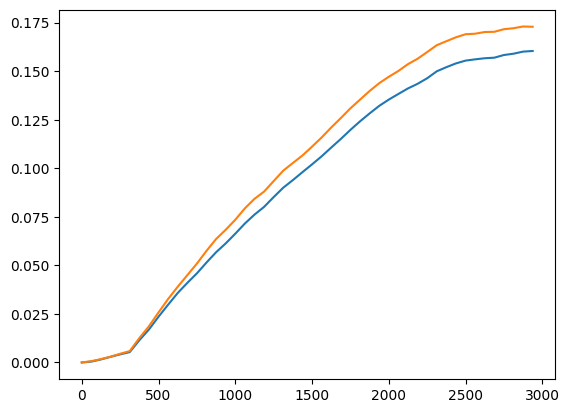

In [ ]:
plt.plot(ds[:len(a)],a)
plt.plot(ds[:len(a)],b)

(array([  5.,  69., 742.,  46.,  17.,  12.,   2.,   3.,   1.,   3.]),
 array([-2.59876717e-04, -1.30657514e-04, -1.43831130e-06,  1.27780891e-04,
         2.57000094e-04,  3.86219297e-04,  5.15438500e-04,  6.44657703e-04,
         7.73876905e-04,  9.03096108e-04,  1.03231531e-03]),
 <BarContainer object of 10 artists>)

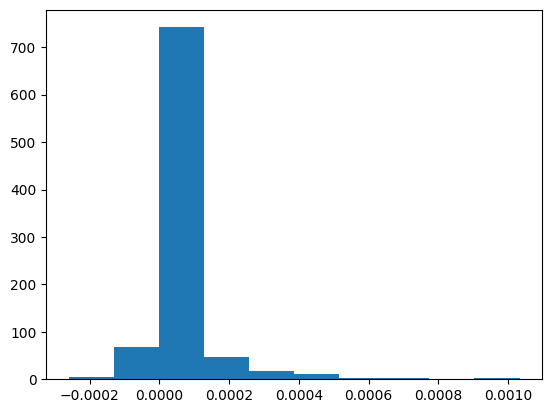

In [ ]:
plt.hist(parameters.detach().numpy()[:,:,None].flatten())

In [ ]:
idx1.shape

(29768, 1)

In [ ]:
import matplotlib.pyplot as plt

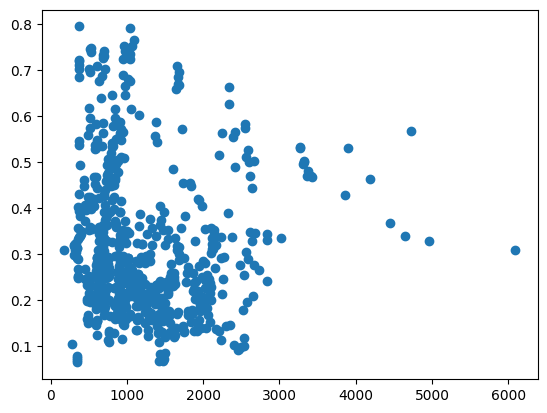

In [ ]:
plt.scatter(distance[np.argwhere(idx1[:,0]==True)],np.stack(samp))

In [ ]:
from cgi import test
from tokenize import Double
from src import Normalising_Flow
from dustmaps.lenz2017 import Lenz2017Query
import dustmaps
from astropy.coordinates import SkyCoord,Galactic
from dustmaps.sfd import SFDQuery
import numpy as np
import pandas as pd
import torch
import seaborn as sn
import matplotlib.pyplot as plt
from dustmaps.bayestar import BayestarQuery
from functorch import jacfwd
from itertools import combinations
from src.Extinction_map import Extinction_Trainer,Extinction_Map,BNN_Extinction
from astropy.coordinates import SkyCoord
from dustmaps.planck import PlanckQuery

from dustmaps.bayestar import BayestarQuery
from dustmaps.lenz2017 import Lenz2017Query
from tqdm.auto import trange
from src.Normalising_Flow import Normalising_Flow_Trainer

from astropy.coordinates import SkyCoord
import astropy.units as u
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule, PyroSample
import torch.nn as nn
import torchbnn as bnn

In [ ]:

map_ext=Extinction_Trainer()

d=np.arange(1,5000,10)
d=2.5*np.log10(d**2/100)-map_ext.mean[0]
d=torch.tensor(d)
distance=d.repeat(len(map_ext.data_test)//32,1).double()

In [ ]:



from pyro.infer.autoguide import AutoDiagonalNormal, AutoMultivariateNormal




from pyro.infer import MCMC, NUTS

model = BNN_Extinction(in_dim=distance.shape[1],out_dim=distance.shape[1])
guide = AutoDiagonalNormal(model)  
model=model.double()

from pyro.infer import SVI, Trace_ELBO


adam = pyro.optim.Adam({"lr": 0.01})
svi = SVI(model, guide, adam, loss=Trace_ELBO())
# Set Pyro random seed
pyro.set_rng_seed(42)

# Define Hamiltonian Monte Carlo (HMC) kernel
# NUTS = "No-U-Turn Sampler" (https://arxiv.org/abs/1111.4246), gives HMC an adaptive step size
nuts_kernel = NUTS(model, jit_compile=True)  # jit_compile=True is faster but requires PyTorch 1.6+

# Define MCMC sampler, get 50 posterior samples
mcmc = MCMC(nuts_kernel, num_samples=1000)



# Convert data to PyTorch tensors
x_train = torch.tensor(map_ext.data_test,dtype=torch.double,requires_grad=False)

#mcmc.run(x_train[:len(x_train)//32],distance)
pyro.clear_param_store()




In [ ]:
num_epochs = 1000
progress_bar = trange(num_epochs)

for epoch in progress_bar:
    loss = svi.step(x_train[:len(x_train)//32],distance)
    progress_bar.set_postfix(loss=f"{loss / x_train.shape[0]:.3f}")
from pyro.infer import Predictive


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
from pyro.infer import Predictive
predictive = Predictive(model, guide=guide, num_samples=100)
preds = predictive(x_train[:len(x_train)//32])



In [ ]:
preds

{'z_i': tensor([[[-0.4696,  1.4320,  1.2444,  ...,  0.3677, -0.3690, -1.7492],
          [ 0.3357,  2.0717,  1.7312,  ...,  2.1322,  0.3115,  0.0289],
          [ 0.2292,  0.9529, -1.0369,  ..., -1.1500,  0.7352,  0.4897],
          ...,
          [ 0.3620,  1.9300,  0.9089,  ...,  0.5852, -0.3159, -2.1450],
          [ 0.2218,  1.7264, -0.8943,  ..., -0.8671,  0.3147, -0.5987],
          [-0.0838,  1.7295,  0.7203,  ..., -0.1560, -1.0325, -1.3253]],
 
         [[-0.4823,  1.2499,  1.2739,  ...,  0.9450,  0.1103, -1.9742],
          [ 0.3315,  2.0164,  1.7161,  ...,  1.8733, -0.4139,  0.0912],
          [ 0.2069,  0.4757, -0.9712,  ..., -0.5323,  0.4915,  0.4292],
          ...,
          [ 0.3732,  2.1701,  0.8858,  ...,  0.7954, -0.8534, -2.3451],
          [ 0.1716,  0.7536, -0.9195,  ..., -1.2212, -0.1657, -0.5880],
          [-0.0755,  1.2762,  0.6788,  ...,  0.0370, -0.5712, -1.4031]],
 
         [[-0.5028,  1.7592,  1.2221,  ...,  0.3417, -0.2635, -1.9053],
          [ 0.3040,  

In [ ]:
z=preds['z_i'].double()


In [ ]:
z

tensor([[[-0.4696,  1.4320,  1.2444,  ...,  0.3677, -0.3690, -1.7492],
         [ 0.3357,  2.0717,  1.7312,  ...,  2.1322,  0.3115,  0.0289],
         [ 0.2292,  0.9529, -1.0369,  ..., -1.1500,  0.7352,  0.4897],
         ...,
         [ 0.3620,  1.9300,  0.9089,  ...,  0.5852, -0.3159, -2.1450],
         [ 0.2218,  1.7264, -0.8943,  ..., -0.8671,  0.3147, -0.5987],
         [-0.0838,  1.7295,  0.7203,  ..., -0.1560, -1.0325, -1.3253]],

        [[-0.4823,  1.2499,  1.2739,  ...,  0.9450,  0.1103, -1.9742],
         [ 0.3315,  2.0164,  1.7161,  ...,  1.8733, -0.4139,  0.0912],
         [ 0.2069,  0.4757, -0.9712,  ..., -0.5323,  0.4915,  0.4292],
         ...,
         [ 0.3732,  2.1701,  0.8858,  ...,  0.7954, -0.8534, -2.3451],
         [ 0.1716,  0.7536, -0.9195,  ..., -1.2212, -0.1657, -0.5880],
         [-0.0755,  1.2762,  0.6788,  ...,  0.0370, -0.5712, -1.4031]],

        [[-0.5028,  1.7592,  1.2221,  ...,  0.3417, -0.2635, -1.9053],
         [ 0.3040,  2.3625,  1.8676,  ...,  1

In [ ]:
z=z.mean(0)
#z=mcmc.get_samples()['z_i'].double().mean(0)#torch.distributions.MultivariateNormal(torch.zeros(7),torch.diag(torch.ones(7))).sample(torch.tensor([10000])).double()
for flow in model.normalising_flow.flows:
    z,det=flow(z)

In [ ]:
z.shape

torch.Size([2484, 7])

In [ ]:
d = z[:,0:1]
ebv = torch.relu(model.layers[0](d))  # input --> hidden
ebv = torch.relu(model.layers[1](ebv))
ebv=torch.relu(model.layers[2](ebv))

In [ ]:
ebv.sum()

tensor(2392.1978, dtype=torch.float64)

In [ ]:
ebv.shape

torch.Size([2484, 1])

In [ ]:
ebv

tensor([[0.8711],
        [0.0806],
        [0.5949],
        ...,
        [0.9332],
        [0.9492],
        [1.6909]], dtype=torch.float64)

In [ ]:
model.normalising_flow.extinction_vector

tensor([ 0.0000,  0.8250, -0.3000,  0.2050,  0.5927,  0.6766,  0.7121],
       dtype=torch.float64)

In [ ]:
out=z.mean(0)#+model.normalising_flow.mean
plt.scatter(out[:,1],out[:,4],s=1)
plt.scatter(x_train[:len(x_train)//32][:,1].detach().numpy(),x_train[:len(x_train)//32][:,4].detach(),s=1)

IndexError: too many indices for tensor of dimension 1

tensor([[-1.6874,  3.0798, -0.5001,  ...,  0.7930,  0.9719,  1.0119],
        [-2.1423,  3.4557, -0.5792,  ...,  0.8952,  1.0582,  1.0813],
        [ 1.2274, -1.0088,  0.2344,  ..., -0.3776, -0.5059, -0.5071],
        ...,
        [-1.7542,  3.4175, -0.5704,  ...,  0.8729,  1.0529,  1.1051],
        [ 0.7542,  0.0877,  0.1214,  ..., -0.1248, -0.1225, -0.1348],
        [-1.4325,  3.2233, -0.5373,  ...,  0.8455,  1.0441,  1.1448]],
       dtype=torch.float64)

In [ ]:
a=preds['av'].mean(0)

In [ ]:
a/3.1

tensor([[[0.3006],
         [0.3528],
         [0.2479],
         ...,
         [0.3037],
         [0.2306],
         [0.2446]]], dtype=torch.float64)

In [ ]:
z[:,0]

tensor([-1.5880, -2.5738,  0.7114,  ..., -1.6270,  0.6542, -1.2357],
       dtype=torch.float64)

In [ ]:
ebv.shape

torch.Size([2484, 1])

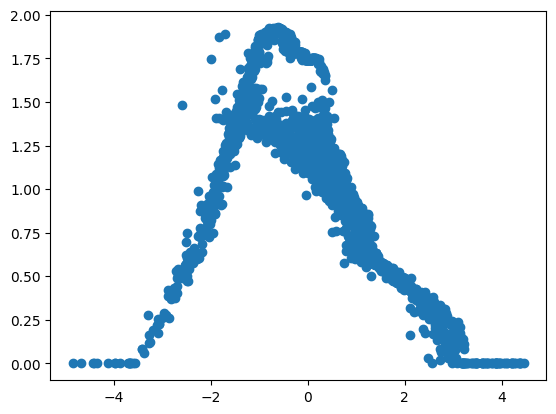

In [ ]:
plt.scatter( x_train[:len(x_train)//32][:,0].detach(),ebv)

In [ ]:
preds['obs']

tensor([[[-2.0812,  3.0549, -0.5175,  ...,  0.8486,  0.9950,  1.1160],
         [-3.4870,  3.5785, -0.6765,  ...,  1.0805,  1.1638,  1.3368],
         [ 1.1497, -0.9074,  0.1776,  ..., -0.3147, -0.4494, -0.5574],
         ...,
         [-1.9443,  3.9951, -0.6452,  ...,  1.0738,  1.0561,  1.3921],
         [ 0.6913,  0.1929,  0.0589,  ..., -0.0479, -0.0936, -0.1746],
         [-1.2348,  3.5090, -0.8488,  ...,  1.1742,  1.3856,  1.5206]],

        [[-2.0812,  3.0549, -0.5175,  ...,  0.8486,  0.9950,  1.1160],
         [-3.4870,  3.5785, -0.6765,  ...,  1.0805,  1.1638,  1.3368],
         [ 1.1497, -0.9074,  0.1776,  ..., -0.3147, -0.4494, -0.5574],
         ...,
         [-1.9443,  3.9951, -0.6452,  ...,  1.0738,  1.0561,  1.3921],
         [ 0.6913,  0.1929,  0.0589,  ..., -0.0479, -0.0936, -0.1746],
         [-1.2348,  3.5090, -0.8488,  ...,  1.1742,  1.3856,  1.5206]],

        [[-2.0812,  3.0549, -0.5175,  ...,  0.8486,  0.9950,  1.1160],
         [-3.4870,  3.5785, -0.6765,  ...,  1

In [ ]:
preds['av'].mean(0)

tensor([0.4823, 0.4928, 0.5015,  ..., 0.4706, 0.4943, 0.4935],
       dtype=torch.float64)

In [ ]:
mcmc._samples

{'av': tensor([[[0.1551],
          [0.1503],
          [0.1436],
          [0.0353],
          [0.0356],
          [0.0369],
          [0.0360],
          [0.0385],
          [0.0444],
          [0.0398]]], dtype=torch.float64),
 'z_i': tensor([[[[ 1.4816,  0.3191, -0.7898,  1.2229,  0.3047,  1.6183,  0.2542]],
 
          [[ 1.4904,  0.3370, -0.7787,  1.2259,  0.2963,  1.6236,  0.2498]],
 
          [[ 1.5040,  0.3378, -0.7528,  1.2170,  0.2921,  1.6210,  0.2496]],
 
          [[ 3.7348,  0.3643,  4.0672,  1.8866,  0.7426,  1.6123, -1.0444]],
 
          [[ 3.6374,  0.3709,  3.9319,  1.9150,  0.7627,  1.5960, -1.0401]],
 
          [[ 3.5938,  0.3814,  3.8139,  1.8956,  0.7984,  1.5669, -0.9774]],
 
          [[ 3.5483,  0.3626,  3.7483,  1.9244,  0.8154,  1.5629, -0.9462]],
 
          [[ 3.3760,  0.3731,  3.1795,  1.8963,  0.9996,  1.5364, -0.8319]],
 
          [[ 2.8581,  0.2602,  2.7097,  1.6312,  0.9218,  1.4735, -1.0540]],
 
          [[ 2.4446,  0.1872,  2.0751,  1.7357,  1.0

In [ ]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=10),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=10, out_features=10),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=10, out_features=1),
    nn.Sigmoid()

)

In [ ]:
nf=Normalising_Flow_Trainer()
nf.load()
nf.nfm.eval()
for param in nf.nfm.parameters():
    param.requires_grad = False


In [ ]:
def loss(ebv,x):
    x=x-nf.extinction_vector[None,:]*ebv

    log_q = torch.zeros(len(x), device=x.device)
    z = x
    for i in range(len(nf.flows) - 1, -1, -1):
        z, log_det = nf.flows[i].inverse(z)
        log_q += log_det


    log_q += nf.q0.log_prob(z)
    return -torch.mean(log_q)

In [ ]:
mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.01)


In [ ]:
map_ext=Extinction_Trainer()


In [ ]:
x_train = torch.tensor(map_ext.data_test,dtype=torch.float,requires_grad=False)


In [ ]:
from torch.utils.data import DataLoader, TensorDataset


In [ ]:
np.arange(0,6000,0.1).shape

(60000,)

In [ ]:
dataset = TensorDataset(x_train)
data_loader = DataLoader(dataset, batch_size=2**8, shuffle=True)

for step in range(15):
    for batch in data_loader:
        x_batch = batch[0]  # Extract the input batch from the DataLoader output
        
        pre = model(x_batch[:, 0:1])
        mse = loss(pre, x_batch)
        kl = kl_loss(model)
        cost = mse + kl_weight * kl

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
    print('Step %d - Avg log_likelihood : %2.2f, Avg KL : %2.2f' % (step, mse.item(), kl.item()))

    


Step 0 - Avg MSE : -2.30, Avg KL : 3.24
Step 1 - Avg MSE : -1.07, Avg KL : 2.98
Step 2 - Avg MSE : -2.34, Avg KL : 2.77
Step 3 - Avg MSE : -2.57, Avg KL : 2.94
Step 4 - Avg MSE : -0.71, Avg KL : 3.13
Step 5 - Avg MSE : -3.30, Avg KL : 2.98
Step 6 - Avg MSE : -1.20, Avg KL : 2.78
Step 7 - Avg MSE : -3.59, Avg KL : 2.77
Step 8 - Avg MSE : -2.73, Avg KL : 2.81


KeyboardInterrupt: 

In [ ]:
ebv.shape

(79500, 1)

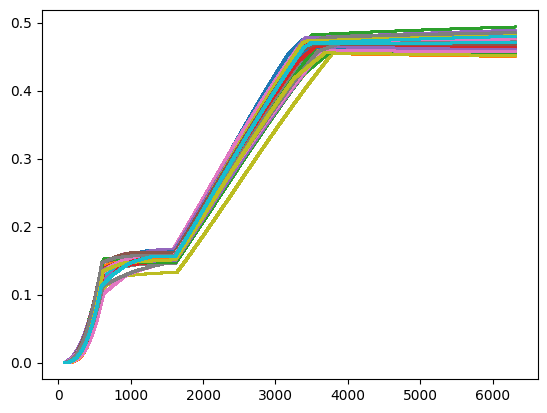

Warmup:   0%|          | 0/100 [00:00, ?it/s]/Users/mattocallaghan/XPNorm/src/Extinction_map.py:243: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. Recommended usage would be tensor.shape[0]. Passing a tensor of different shape might lead to errors or silently give incorrect results.
  log_det = torch.zeros(len(z), device=z.device)
/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/normflows/utils/splines.py:115: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorr

KeyboardInterrupt: 

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
from pyro.infer import Predictive
predictive = Predictive(model, guide=guide, num_samples=10)
preds = predictive(x_train)



In [ ]:
preds['av'].mean(0)

tensor([-5.8063e-05, -1.0093e-02, -1.2688e-02,  ...,  3.3000e-02,
         3.4696e-02, -3.5208e-02], dtype=torch.float64)

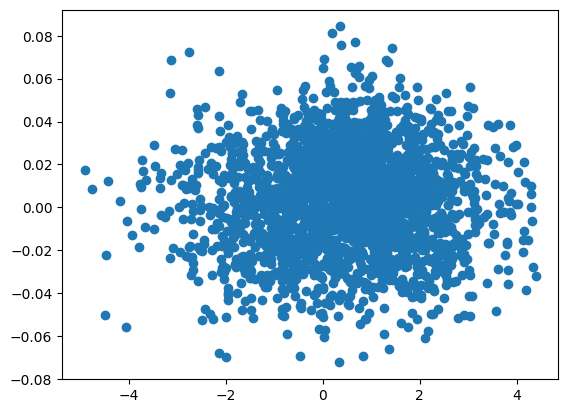

In [ ]:
plt.scatter(x_train.detach().numpy()[:,0],preds['av'].mean(0).detach().numpy())

In [ ]:


z=preds['z_i'].mean(0).double()
for flow in model.normalising_flow.flows:
    z, log_det = flow(z)

In [ ]:
(preds['obs'].mean(0))

tensor([[-2.0812,  3.0549, -0.5175,  ...,  0.8486,  0.9950,  1.1160],
        [-3.4870,  3.5785, -0.6765,  ...,  1.0805,  1.1638,  1.3368],
        [ 1.1497, -0.9074,  0.1776,  ..., -0.3147, -0.4494, -0.5574],
        ...,
        [-1.9443,  3.9951, -0.6452,  ...,  1.0738,  1.0561,  1.3921],
        [ 0.6913,  0.1929,  0.0589,  ..., -0.0479, -0.0936, -0.1746],
        [-1.2348,  3.5090, -0.8488,  ...,  1.1742,  1.3856,  1.5206]],
       dtype=torch.float64)

In [ ]:
x_train

tensor([[-2.0812,  3.0549, -0.5175,  ...,  0.8486,  0.9950,  1.1160],
        [-3.4870,  3.5785, -0.6765,  ...,  1.0805,  1.1638,  1.3368],
        [ 1.1497, -0.9074,  0.1776,  ..., -0.3147, -0.4494, -0.5574],
        ...,
        [-1.9443,  3.9951, -0.6452,  ...,  1.0738,  1.0561,  1.3921],
        [ 0.6913,  0.1929,  0.0589,  ..., -0.0479, -0.0936, -0.1746],
        [-1.2348,  3.5090, -0.8488,  ...,  1.1742,  1.3856,  1.5206]],
       dtype=torch.float64)

In [ ]:
predictive(x_train.double())

<built-in method type of Tensor object at 0x10f4a8e50>
<built-in method type of Tensor object at 0x10f4a8e50>
<built-in method type of Tensor object at 0x16b7115e0>


{'z_i': tensor([[[ 0.1293,  0.4631,  0.1533,  ..., -0.0764,  0.2722, -0.3219],
          [ 0.0699,  0.2528, -0.0322,  ..., -0.1307,  0.1172,  0.0568],
          [-0.2727, -0.0281, -0.2400,  ...,  0.3761, -0.3767,  0.2144],
          ...,
          [ 0.2049,  0.2104,  0.1045,  ..., -0.4332,  0.1669, -0.1399],
          [-0.2090, -0.0676, -0.2290,  ...,  0.0507, -0.1737,  0.1037],
          [ 0.2505,  0.2029,  0.3163,  ..., -0.0710,  0.2389, -0.2051]]]),
 'obs': tensor([[[-2.0812,  3.0549, -0.5175,  ...,  0.8486,  0.9950,  1.1160],
          [-3.4870,  3.5785, -0.6765,  ...,  1.0805,  1.1638,  1.3368],
          [ 1.1497, -0.9074,  0.1776,  ..., -0.3147, -0.4494, -0.5574],
          ...,
          [-1.9443,  3.9951, -0.6452,  ...,  1.0738,  1.0561,  1.3921],
          [ 0.6913,  0.1929,  0.0589,  ..., -0.0479, -0.0936, -0.1746],
          [-1.2348,  3.5090, -0.8488,  ...,  1.1742,  1.3856,  1.5206]]],
        dtype=torch.float64)}

In [ ]:


samples_svi = predictive(x_train)

y_new_svi = []

for i in range(50):
    y_ = torch.bincount(samples_svi['obs'][:,i], minlength=2).float()/samples_svi['obs'].shape[0]
    y_new_svi.append(y_.numpy())


RuntimeError: t() expects a tensor with <= 2 dimensions, but self is 3D
       Trace Shapes:         
        Param Sites:         
       Sample Sites:         
layers.0.weight dist   | 10 1
               value 1 | 10 1
  layers.0.bias dist   | 10  
               value 1 | 10  